In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap
from sklearn.metrics import accuracy_score

df = pd.read_pickle('df.pkl')

In [3]:
x_train, x_test, y_train, y_test = train_test_split( df.drop('target',axis=1), df['target'], test_size = 0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
feature_names = df.drop('target', axis=1).columns.tolist()
importances = clf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
print(feature_imp_df)

     Feature  Gini Importance
7    thalach         0.139891
9    oldpeak         0.127506
2         cp         0.124060
11        ca         0.093895
0        age         0.082784
12      thal         0.080358
4       chol         0.072846
8      exang         0.071811
3   trestbps         0.066645
10     slope         0.056487
1        sex         0.053196
6    restecg         0.019481
5        fbs         0.011040


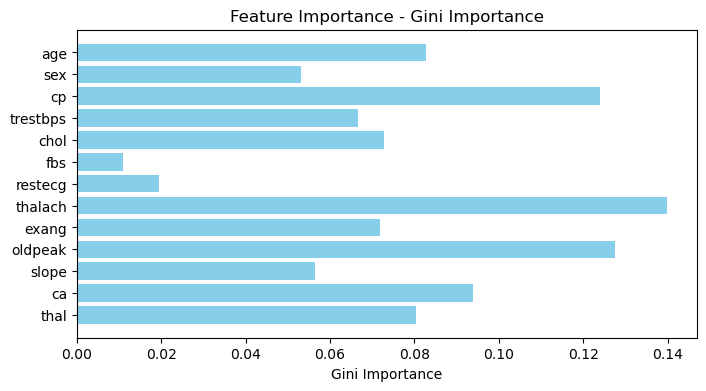

In [8]:
plt.figure(figsize=(8, 4))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()
plt.show()